In [1]:

import math
import numpy as np 
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing

from operator import itemgetter

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from math import sqrt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model
import keras
import h5py
import requests


from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

**Load Data**

In [3]:
df = pd.read_csv('../Data10/BrentOilPrices.csv')
df.Date = pd.to_datetime(df.Date)
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_2816\4286076612.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Date = pd.to_datetime(df.Date)


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


**EDA**

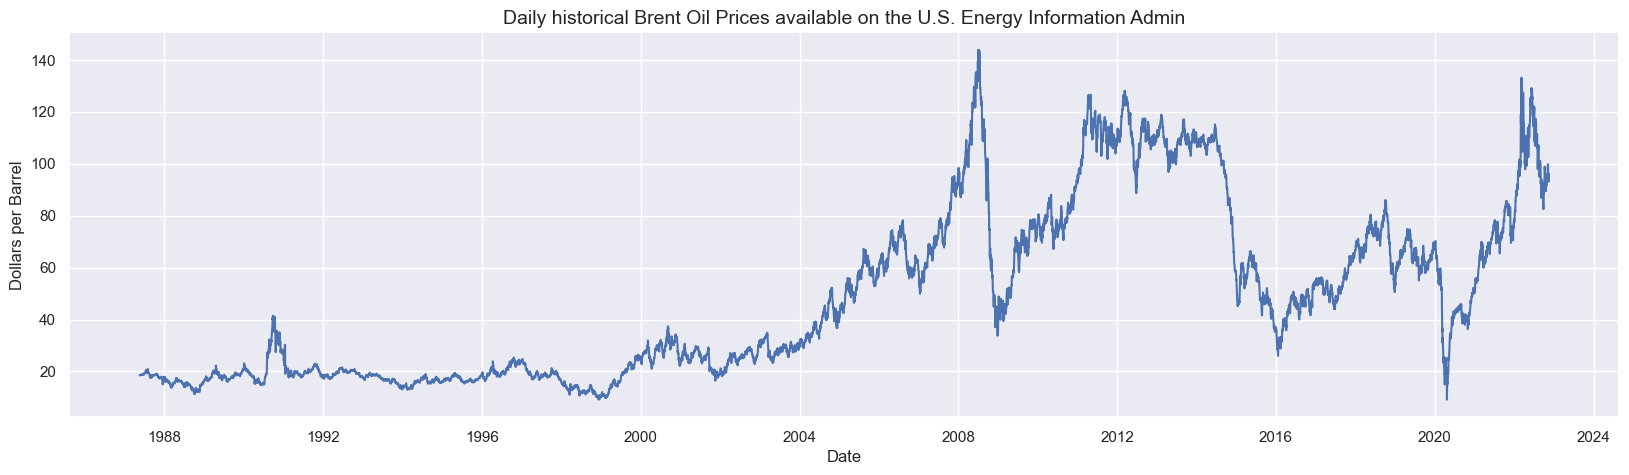

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns # using seaborn because the charts are more visually pleasing

sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
sns.lineplot(x="Date", y="Price", data=df)
plt.title('Daily historical Brent Oil Prices available on the U.S. Energy Information Admin', fontsize=14)
plt.ylabel('Dollars per Barrel')
plt.show()

In [5]:
df.describe()

,Date,Price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958720,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


In [6]:
scalerz = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = scalerz.fit_transform(df.Price.values.reshape(-1, 1))

In [7]:
dataset[0:10]

array([[0.07067112],
       [0.0693363 ],
       [0.07007786],
       [0.07044865],
       [0.07067112],
       [0.07044865],
       [0.07044865],
       [0.07030033],
       [0.07081943],
       [0.0710419 ]])

**Train Test Split**

In [9]:
# split into train and test sets

splitz =0.7
train_size = int(len(dataset) * splitz)
test_size = int(len(dataset) * (1-splitz))
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
f'Dataset size: {len(df)} >> Train length: {len(train)} || Test Length: {len(test)}'


'Dataset size: 9011 >> Train length: 6307 || Test Length: 2704'

In [10]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
x_train, y_train = create_dataset(train, look_back=15)
x_test, y_test = create_dataset(test, look_back=15)
f'X_train: {x_train.shape} || \
y_train: {y_train.shape} || \
X_test: {x_test.shape} || \
y_test: {y_test.shape}'

'X_train: (6291, 15) || y_train: (6291,) || X_test: (2688, 15) || y_test: (2688,)'

**LSTM Model Traning**

In [15]:
# create and fit the LSTM network
look_back = 15

# Reshape input data to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, look_back))
x_test = np.reshape(x_test, (x_test.shape[0], 1, look_back))

model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


# Simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('best_model.h5', 
# monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)


Epoch 1/20
6291/6291 - 13s - 2ms/step - loss: 8.2464e-04
Epoch 2/20
6291/6291 - 11s - 2ms/step - loss: 2.1506e-04
Epoch 3/20
6291/6291 - 20s - 3ms/step - loss: 1.8124e-04
Epoch 4/20
6291/6291 - 11s - 2ms/step - loss: 1.6755e-04
Epoch 5/20
6291/6291 - 12s - 2ms/step - loss: 1.6819e-04
Epoch 6/20
6291/6291 - 13s - 2ms/step - loss: 1.4694e-04
Epoch 7/20
6291/6291 - 12s - 2ms/step - loss: 1.3899e-04
Epoch 8/20
6291/6291 - 12s - 2ms/step - loss: 1.3980e-04
Epoch 9/20
6291/6291 - 14s - 2ms/step - loss: 1.4441e-04
Epoch 10/20
6291/6291 - 18s - 3ms/step - loss: 1.3167e-04
Epoch 11/20
6291/6291 - 12s - 2ms/step - loss: 1.2497e-04
Epoch 12/20
6291/6291 - 12s - 2ms/step - loss: 1.2989e-04
Epoch 13/20
6291/6291 - 14s - 2ms/step - loss: 1.2563e-04
Epoch 14/20
6291/6291 - 11s - 2ms/step - loss: 1.2060e-04
Epoch 15/20
6291/6291 - 11s - 2ms/step - loss: 1.2208e-04
Epoch 16/20
6291/6291 - 11s - 2ms/step - loss: 1.1499e-04
Epoch 17/20
6291/6291 - 12s - 2ms/step - loss: 1.1938e-04
Epoch 18/20
6291/6291 -